In [1]:
import numpy as np
import pandas as pd

In [2]:
china = np.load('china.npy')
china

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
china = china - 1

In [4]:
china

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

C:\Users\alzio\AppData\Local\Temp\ipykernel_22280\3982376073.py:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("hsv").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


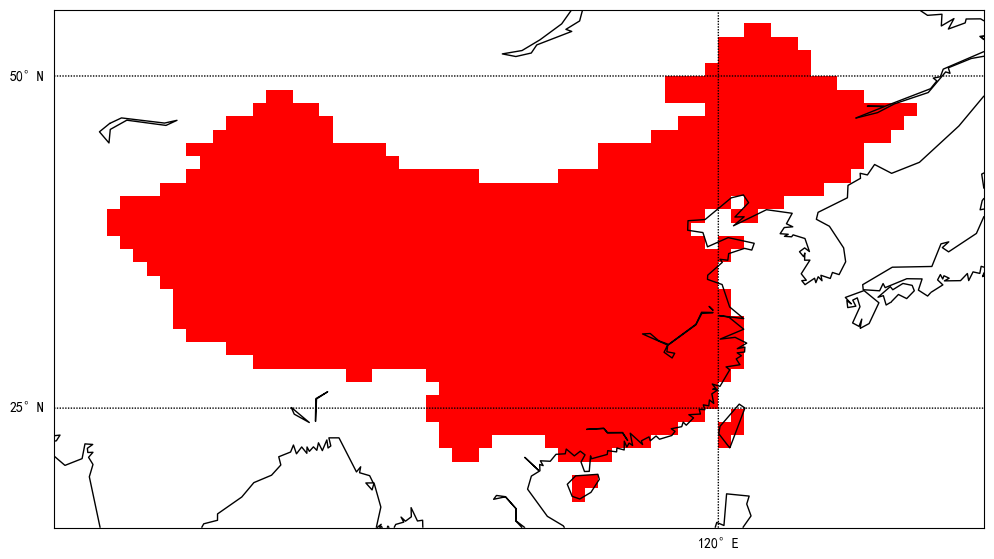

In [7]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=70., llcrnrlat=16., urcrnrlon=140., urcrnrlat=55.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, china, cmap='hsv', vmin=0.0, vmax=1.0)
mapPlot.cmap.set_under('w')  # 设置底色
# cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [8]:
city_paths = ["H:\\Region\\中国十大城市群行政区划数据（shp格式）\\成渝城市群\\成渝城市群_地级市级边界.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\关中平原城市群\\关中平原城市群_地级市边界.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\海峡西岸城市群\\海峡西岸城市群_地级市等级.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\京津冀城市群\京津冀城市群（包括安阳市）\\京津冀城市群（包括安阳市）_地级市边界shp.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\辽中南城市群\辽中南城市群（包括丹东市）\\辽中南城市群（包括丹东市）_地级市边界.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\山东半岛城市群\山东半岛城市群（覆盖全省16个地级市）\\山东半岛城市群（覆盖16地级市）_地级市边界.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\长江三角洲城市群\\长江三角洲城市群_地级市层级.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\长江中游城市群\\长江中游城市群_地级市等级.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\中原城市群\\中原城市群_地级市边界.shp",
              "H:\\Region\\中国十大城市群行政区划数据（shp格式）\\珠江三角洲城市群\\珠江三角洲城市群_区县级边界.shp"]

city_shps = [gpd.read_file(city_paths[i]) for i in range(10)]

<AxesSubplot:>

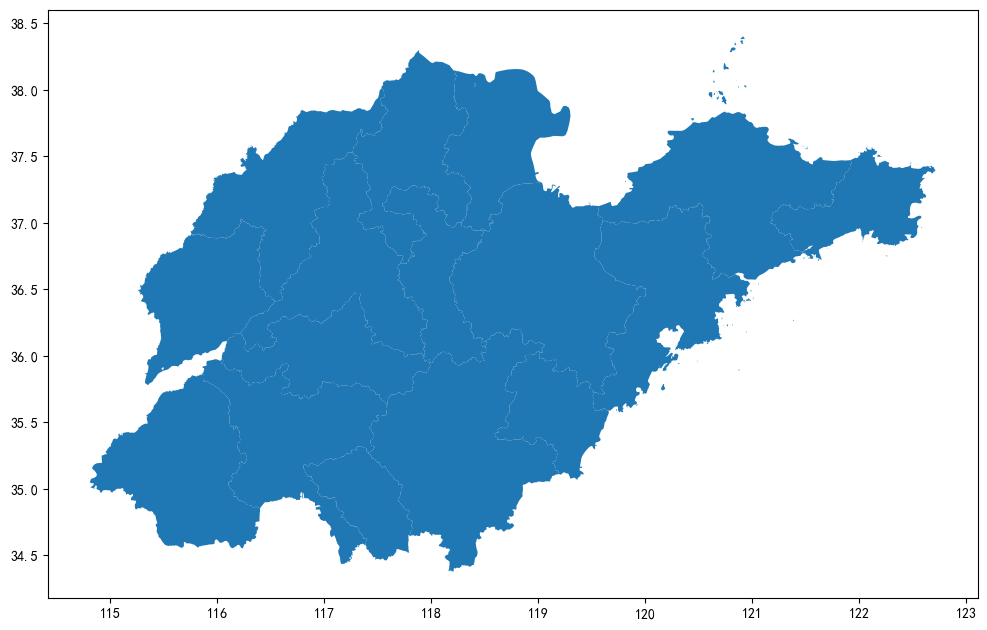

In [9]:
city_shps[5].plot()

In [11]:
for i in range(10):
    city_shps[i]["agg"] = i+1

city_shps[0]

,省,省代码,市,市代码,市类型,省类型,geometry,agg
0,四川省,510000,成都市,510100,地级市,省,"MULTIPOLYGON (((104.46952 30.15233, 104.46944 ...",1
1,四川省,510000,达州市,511700,地级市,省,"MULTIPOLYGON (((107.24955 30.32746, 107.25012 ...",1
2,四川省,510000,德阳市,510600,地级市,省,"MULTIPOLYGON (((104.10587 31.03381, 104.10586 ...",1
3,四川省,510000,广安市,511600,地级市,省,"MULTIPOLYGON (((107.04976 30.04178, 107.04956 ...",1
4,四川省,510000,乐山市,511100,地级市,省,"MULTIPOLYGON (((104.14694 29.47274, 104.14661 ...",1
5,四川省,510000,泸州市,510500,地级市,省,"MULTIPOLYGON (((105.38309 29.28838, 105.38295 ...",1
6,四川省,510000,眉山市,511400,地级市,省,"MULTIPOLYGON (((103.44450 30.12746, 103.44517 ...",1
7,四川省,510000,绵阳市,510700,地级市,省,"MULTIPOLYGON (((104.87289 30.93687, 104.87286 ...",1
8,四川省,510000,南充市,511300,地级市,省,"MULTIPOLYGON (((106.94432 31.26717, 106.94413 ...",1
9,四川省,510000,内江市,511000,地级市,省,"MULTIPOLYGON (((105.38120 29.28606, 105.38112 ...",1


In [12]:
city_shp = pd.concat(city_shps, axis=0)[["agg", "省", "市", "geometry"]]
city_shp

,agg,省,市,geometry
0,1,四川省,成都市,"MULTIPOLYGON (((104.46952 30.15233, 104.46944 ..."
1,1,四川省,达州市,"MULTIPOLYGON (((107.24955 30.32746, 107.25012 ..."
2,1,四川省,德阳市,"MULTIPOLYGON (((104.10587 31.03381, 104.10586 ..."
3,1,四川省,广安市,"MULTIPOLYGON (((107.04976 30.04178, 107.04956 ..."
4,1,四川省,乐山市,"MULTIPOLYGON (((104.14694 29.47274, 104.14661 ..."
...,...,...,...,...
45,10,广东省,肇庆市,"POLYGON ((112.71480 23.68984, 112.71542 23.689..."
46,10,广东省,中山市,"POLYGON ((113.68691 22.51808, 113.66333 22.483..."
47,10,广东省,珠海市,"MULTIPOLYGON (((113.08065 22.09552, 113.07997 ..."
48,10,广东省,珠海市,"MULTIPOLYGON (((113.16930 21.86790, 113.17296 ..."


<AxesSubplot:>

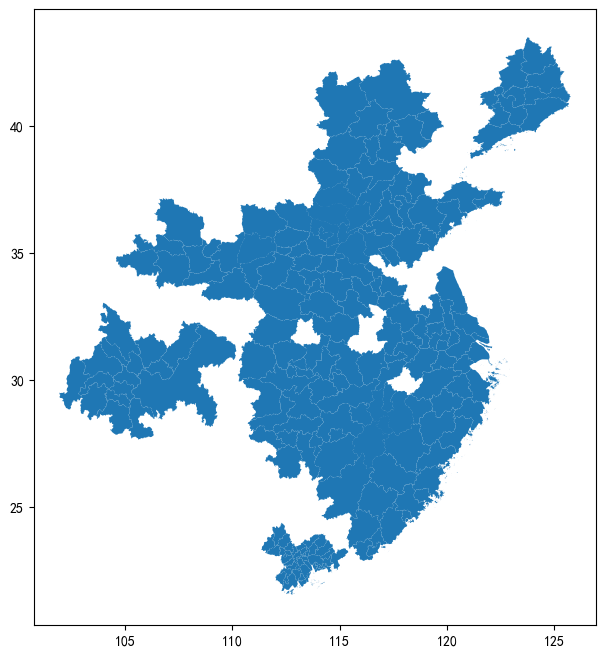

In [15]:
city_shp.plot()

In [28]:
# 分组聚合求区域属于不同城市群的面积大小
city_shp.groupby('agg')['geometry'].agg(lambda s: s.geometry.area.sum()).idxmax()

C:\Users\alzio\AppData\Local\Temp\ipykernel_22280\3536413786.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city_shp.groupby('agg')['geometry'].agg(lambda s: s.geometry.area.sum()).idxmax()


8

In [36]:
from shapely.geometry import box

# 逻辑：中国陆地栅格内属于城市群的面积大于2/5的认为城市群栅格，并归属于其中占面积最大的城市群
for lat in range(90, 145):
    for lon in range(250, 320):
        if china[lat, lon] == -1.0:
            continue
        bbox_polygon = box(lon - 180., lat - 90., lon - 179., lat - 89.)
        bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs=city_shp.crs)
        clipped_gdf = gpd.clip(city_shp, bbox_gdf)

        if clipped_gdf.geometry.area.sum() > 0.4:
            china[lat, lon] = float(clipped_gdf.groupby('agg')['geometry'].agg(lambda s: s.geometry.area.sum()).idxmax())

C:\Users\alzio\AppData\Local\Temp\ipykernel_22280\2510400400.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if clipped_gdf.geometry.area.sum() > 0.4:
C:\Users\alzio\AppData\Local\Temp\ipykernel_22280\2510400400.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if clipped_gdf.geometry.area.sum() > 0.4:
C:\Users\alzio\AppData\Local\Temp\ipykernel_22280\2510400400.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if clipped_gdf.geometry.area.sum() > 0.4:
C:\Users\alzio\AppData\Local\Temp\ipykernel_22280\2510400400.py:12: UserWarning: Geometry is in a geographic CRS. Results

C:\Users\alzio\AppData\Local\Temp\ipykernel_22280\2859000689.py:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Paired").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


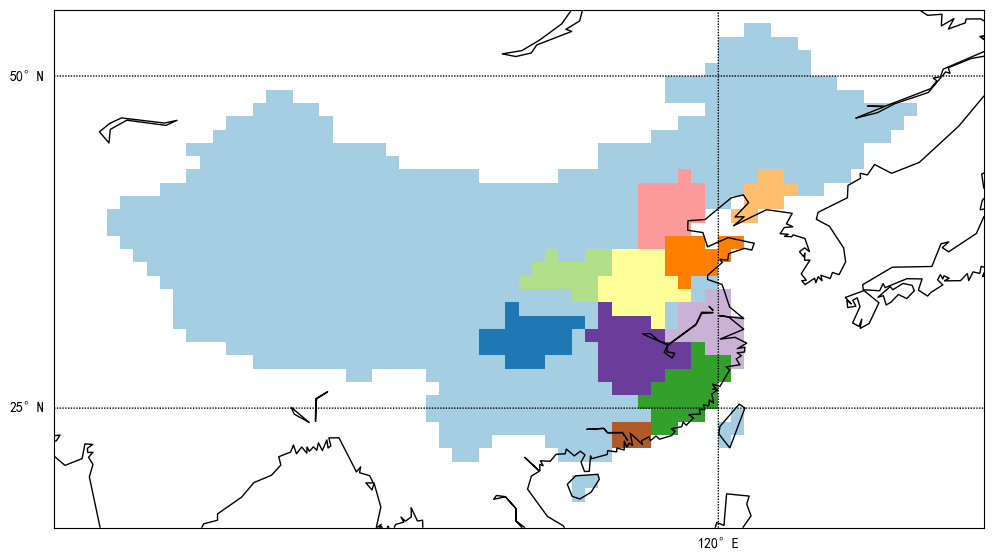

In [37]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=70., llcrnrlat=16., urcrnrlon=140., urcrnrlat=55.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, china, cmap='Paired', vmin=0.0, vmax=10.0)
mapPlot.cmap.set_under('w')  # 设置底色
# cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [38]:
np.save("china_cities.npy", china)